# TMDB Analysis
By Matthew Fricker

<img src = "denise-jans-Lq6rcifGjOU-unsplash.jpg" width=700/>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from matplotlib.ticker import FuncFormatter

In [5]:
import re

In [7]:
df = pd.read_csv("TMDB_movies.csv")
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [9]:
pd.set_option('display.max_columns', None)

Code Adjustment - Using regex to read JSON type columns into more useable lists.

In [11]:
df["genres"] = df.genres.str.findall(r"\"name\": \"([\w]*)\"")
df["keywords"] = df.keywords.str.findall(r"\"name\": \"([\w]*)\"")
df["production_companies"] = df.production_companies.str.findall(r"\"name\": \"([\w\s]*)\"")
df["production_countries"] = df.production_countries.str.findall(r"\"iso_3166_1\": \"([A-Z]{2})\"")
df["spoken_languages"] = df.spoken_languages.str.findall(r"\"iso_639_1\": \"([\w]+)\"")

## Key Finding 1 
The dataset is overwhelmingly focused on American films. 82.37% of films in the dataset had production in the United States. The next most common country was the UK, with 13.24% produced there in some capacity.

C:\Users\matth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


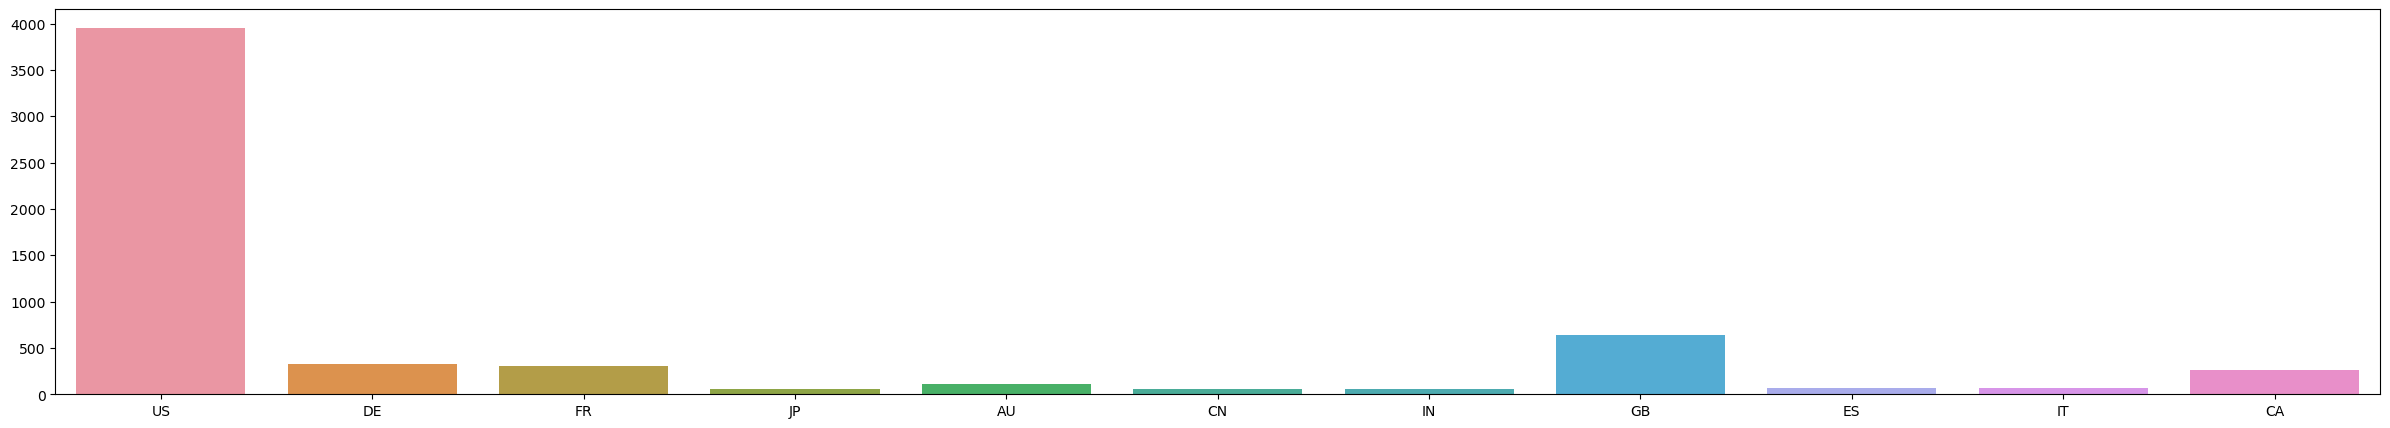

In [13]:
country_set = set(sum(list(df.production_countries), []))
country_counts = {} # Creating dictionary of country counts
for country in country_set:
    country_count = df[df.production_countries.apply(lambda x: country in x)].id.count() # Counting how many films list a given country in its production countries columm
    if country_count > 50: # Filtering out smaller countries
        country_counts[country] = country_count

# Adjusting to lists to fit with barplot requirements
keys = list(country_counts.keys())
vals = [float(country_counts[k]) for k in keys]

plt.figure(figsize = (30,5))
sns.barplot(x=keys, y=vals)
plt.show()

In [15]:
is_american = df[df.production_countries.apply(lambda x: "US" in x)].id.count() / df.id.count() #Percentage of films with an American production
print(f"{is_american*100:.2f}%")

82.37%


In [17]:
is_british = df[df.production_countries.apply(lambda x: "GB" in x)].id.count() / df.id.count() #Percentage of films with a British production
print(f"{is_british*100:.2f}%")

13.24%


In [19]:
df["profit"] = df.revenue - df.budget

## Key Finding 2

As budgets have gone up over time, revenues have also risen, although profits have not increased dramatically since the 1970s - though they have grown more consistent.

In [21]:
df["release_year"] = df.release_date.str.extract(r"(\d{4})").astype("Int64") # Getting the release year from the date

In [31]:
non_zeroes = df[(df.budget != 0) & (df.revenue != 0)] #Ignoring films with zero budget or zero revenue

In [32]:
revenue_by_year = non_zeroes[non_zeroes.budget != 0].groupby("release_year").revenue.mean() #Getting the average revenue for each year

### Revenue

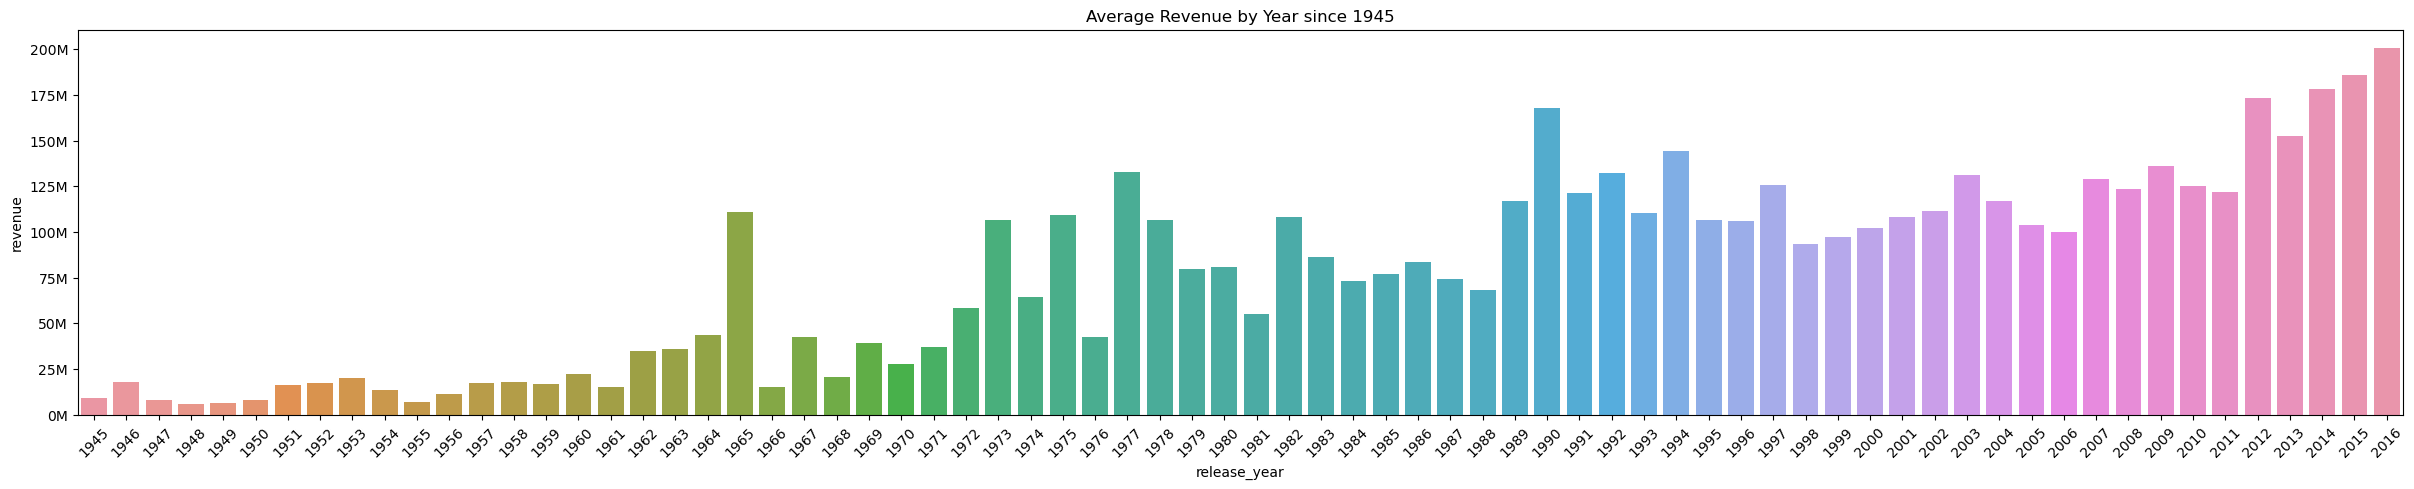

In [59]:
# Defining the scale for the y-axes
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.0fM' % (x * 1e-6)

formatter = FuncFormatter(millions) 
# Source: Bogdan Veliscu on StackExchange: https://stackoverflow.com/questions/61330427/set-y-axis-in-millions

plt.figure(figsize=(30,5))
plt.xticks(rotation=45)
plt.title("Average Revenue by Year since 1945")
ax = sns.barplot(x=revenue_by_year.index[17:], y=revenue_by_year[17:])
ax.yaxis.set_major_formatter(formatter)
plt.show()

### Budgets

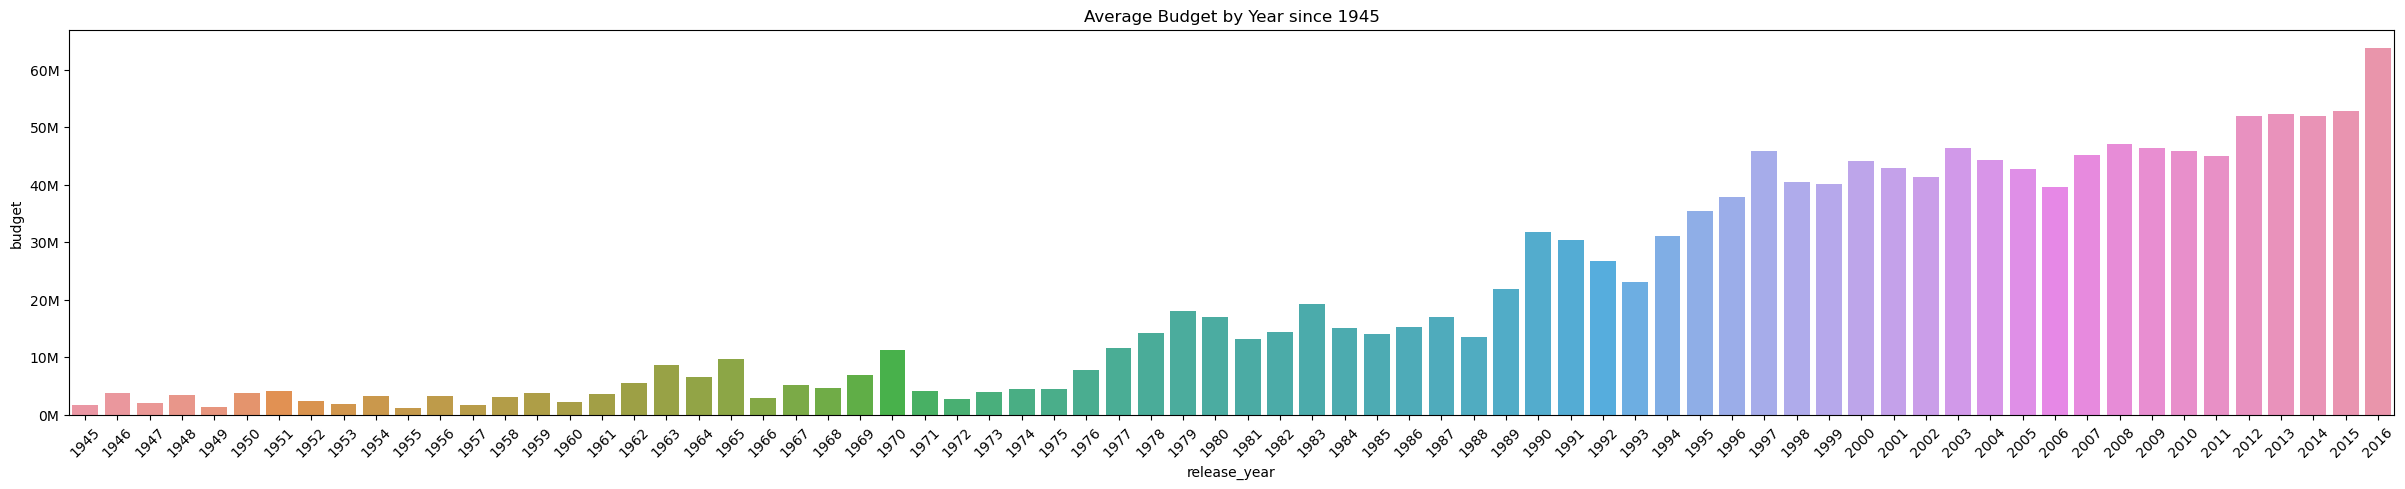

In [57]:
mean_budget_by_year = non_zeroes[non_zeroes.budget != 0].groupby("release_year").budget.mean() #Getting average budget per year
plt.figure(figsize=(30,5))
plt.xticks(rotation=45)
plt.title("Average Budget by Year since 1945")
ax = sns.barplot(x=mean_budget_by_year.index[17:], y=mean_budget_by_year[17:])
ax.yaxis.set_major_formatter(formatter)
plt.show()

### Profits

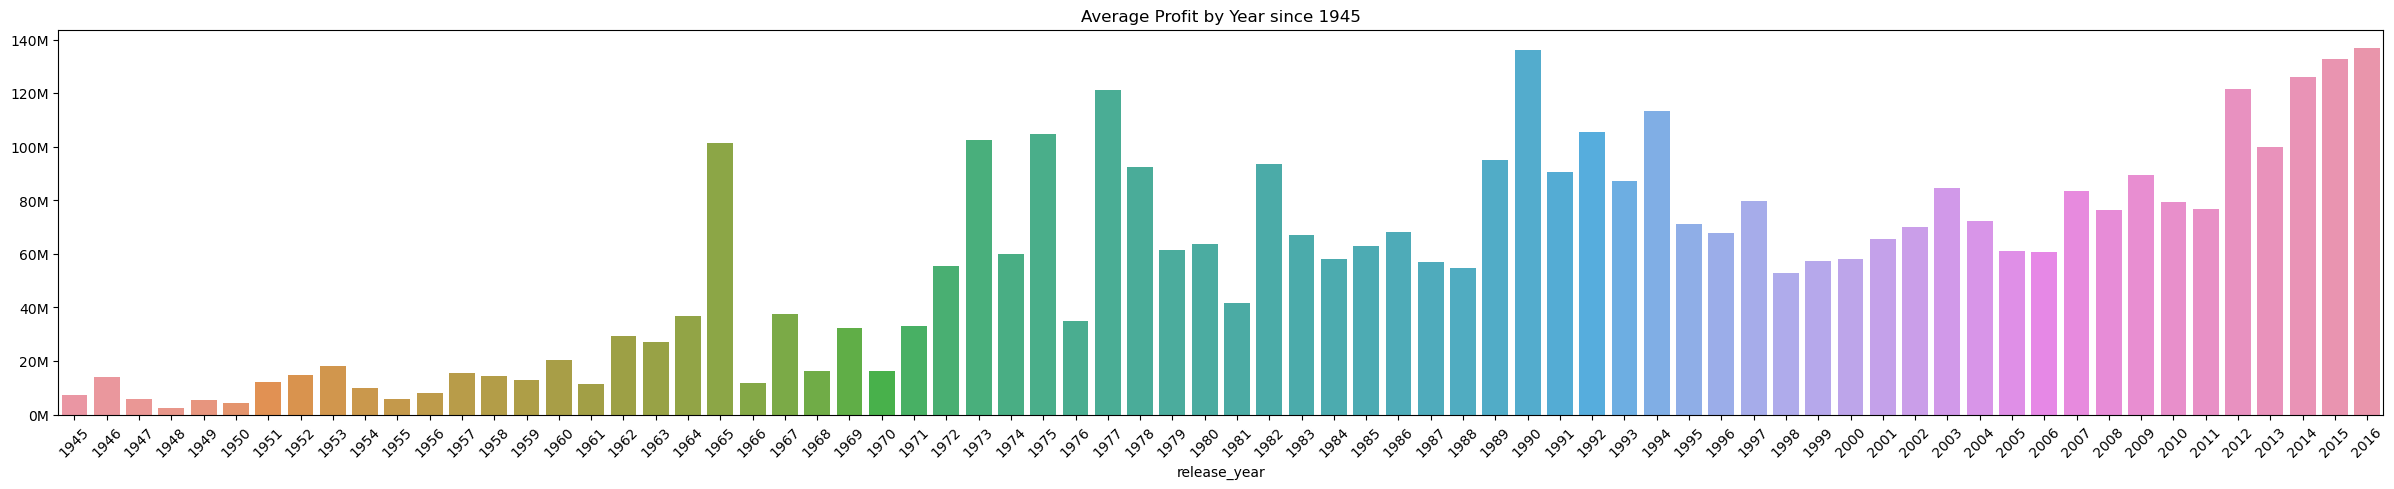

In [55]:
profit_by_year = revenue_by_year - mean_budget_by_year
plt.figure(figsize=(30,5))
plt.xticks(rotation=45)
plt.title("Average Profit by Year since 1945")
ax = sns.barplot(x=profit_by_year.index[17:], y=profit_by_year.loc[1945:])
ax.yaxis.set_major_formatter(formatter)
plt.show()

In [138]:
non_zeroes[non_zeroes.release_year == 1965][["title", "budget", "revenue", "profit"]].sort_values(by="profit", ascending=False)

,title,budget,revenue,profit
3236,The Sound of Music,8200000,286214286,278014286
3162,Thunderball,5500000,141195658,135695658
2914,Doctor Zhivago,11000000,111858363,100858363
3815,Major Dundee,3800000,14873,-3785127
2192,The Greatest Story Ever Told,20000000,15473333,-4526667


## Key Finding 3

Higher budgets tend to lead to higher revenues.

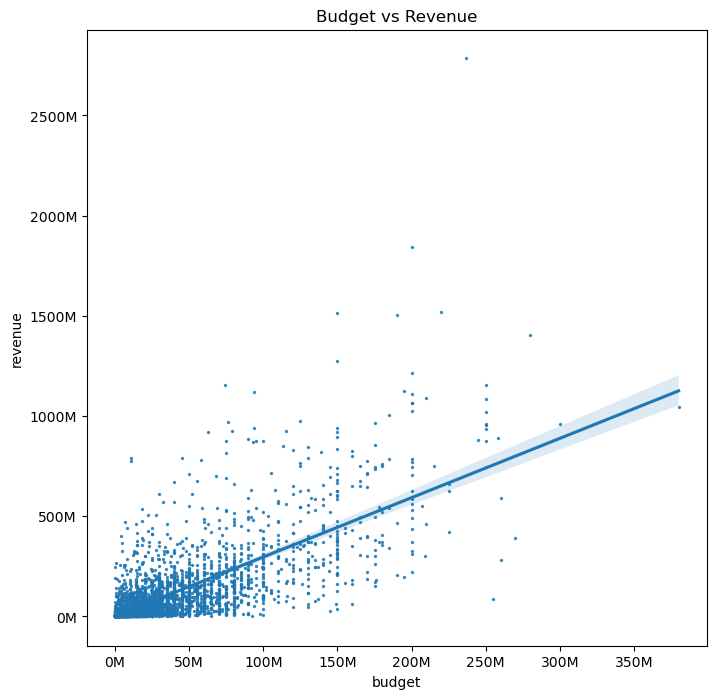

In [98]:
plt.figure(figsize=(8,8))
plt.title("Budget vs Revenue")
ax = sns.regplot(x=non_zeroes.budget, y=non_zeroes.revenue, scatter_kws={'s':2})
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)
plt.show()

## Key Finding 4

Family-friendly genres were the biggest hits in terms of revenue, while foreign films and documentaries underperformed at the box office.

In [49]:
all_keywords = set(sum(list(df.keywords), []))
all_genres = set(sum(list(df.genres), [])) 
#Getting a list of all genres and keywords

In [51]:
genre_revenues = {}
#Creating a dictionary of genres and their average revenues
for genre in all_genres: 
    revenue_with = non_zeroes[non_zeroes.genres.apply(lambda x: genre in x)].revenue.mean()
    genre_revenues[genre] = revenue_with

C:\Users\matth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


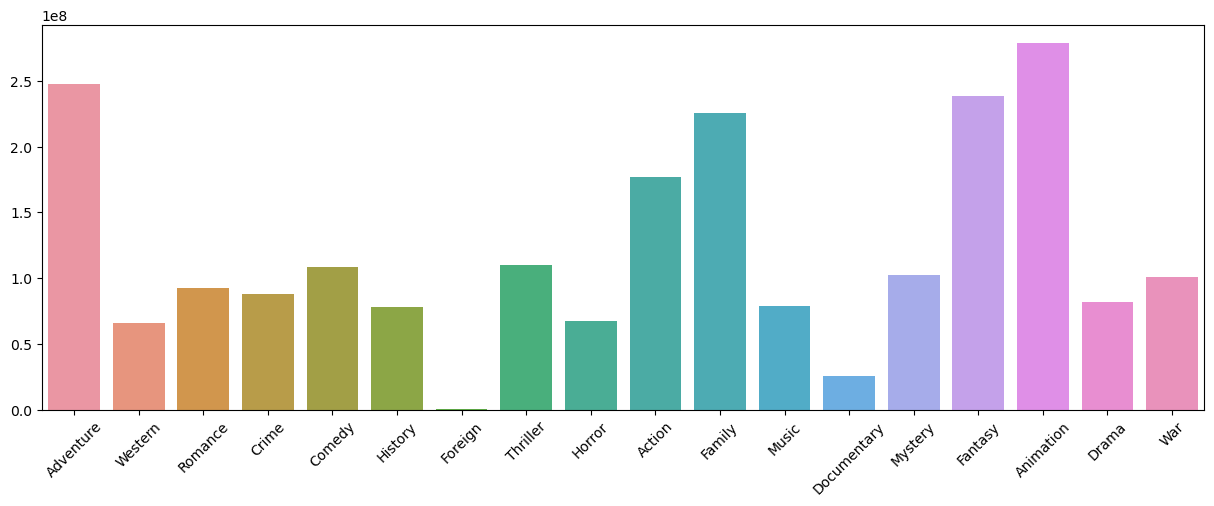

In [53]:
# Plotting the values as a bar chart
keys = list(genre_revenues.keys())
vals = [float(genre_revenues[k]) for k in keys]
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.barplot(x = keys, y = vals)
plt.show()

## Individual Observation: The Lone Ranger

In [128]:
df[df.profit == df.profit.min()][["title", "profit"]]

,title,profit
13,The Lone Ranger,-165710090


In [63]:
df[df.title == "The Lone Ranger"]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit,release_year,n_genres,n_countries,n_companies,n_languages
13,255000000,"[Action, Adventure, Western]",http://disney.go.com/the-lone-ranger/,57201,"[texas, horse, survivor, partner, outlaw, esca...",en,The Lone Ranger,The Texas Rangers chase down a gang of outlaws...,49.046956,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[US],2013-07-03,89289910,149.0,[en],Released,Never Take Off the Mask,The Lone Ranger,5.9,2311,-165710090,2013,3,1,5,1


In [87]:
lone_ranger_kw = df[df.title == "The Lone Ranger"].keywords[13] #Keywords for The Lone Ranger
", ".join(lone_ranger_kw)

'texas, horse, survivor, partner, outlaw, escape, lawyer, train, comanche, tonto'

### Average revenue for keywords

In [102]:
kw_revenues = np.nanmean([non_zeroes[non_zeroes.keywords.apply(lambda x: kw in x)].revenue.mean() for kw in all_keywords])
print(f"${kw_revenues:,.2f}")

$139,052,988.50


### Revenues for keywords used by The Lone Ranger

In [112]:
lr = non_zeroes.drop(index=13) #Exclude The Lone Ranger
for kw in lone_ranger_kw:
    kwdf = lr[lr.keywords.apply(lambda x: kw in x)] #Get films using keyword
    if kwdf.id.count() > 1: #Ignore keywords used only once
        print(f"{kw:<20}\t${kwdf.revenue.mean():,.2f}")

texas               	$30,272,384.19
horse               	$97,310,449.00
survivor            	$84,250,640.11
partner             	$141,513,691.20
outlaw              	$38,355,130.44
escape              	$173,997,227.05
lawyer              	$106,225,999.03
train               	$129,007,361.27


## Individual Observation: Avatar

In [126]:
df[df.profit == df.profit.max()][["title", "profit"]]

,title,profit
0,Avatar,2550965087


In [91]:
df[df.title == "Avatar"]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit,release_year,n_genres,n_countries,n_companies,n_languages
0,237000000,"[Action, Adventure, Fantasy]",http://www.avatarmovie.com/,19995,"[future, society, futuristic, romance, space, ...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[US, GB]",2009-12-10,2787965087,162.0,"[en, es]",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087,2009,3,2,4,2


In [85]:
avatar_kw = df[df.title == "Avatar"].keywords[0] #Keywords for Avatar
", ".join(avatar_kw)

'future, society, futuristic, romance, space, alien, tribe, cgi, marine, soldier, battle, 3d'

### Average Revenue for keywords used by Avatar

In [110]:
av = non_zeroes.drop(index=0) #Exclude Avatar
for kw in avatar_kw:
    kwdf = av[av.keywords.apply(lambda x: kw in x)] #Find films with each keyword
    if kwdf.id.count() > 1: #Ignore keywords used only once
        print(f"{kw:<20}\t${kwdf.revenue.mean():,.2f}")

future              	$158,301,696.79
society             	$217,669,694.40
futuristic          	$157,759,860.12
romance             	$139,519,684.40
space               	$238,095,027.04
alien               	$179,806,517.01
tribe               	$104,817,835.50
cgi                 	$222,485,676.50
soldier             	$129,618,664.83
battle              	$242,263,516.04
3d                  	$400,373,443.54


In [146]:
non_zeroes[non_zeroes.keywords.apply(lambda x: "3d" in x)][["title", "profit"]].sort_values(by="profit", ascending=False).head(40)

,title,profit
0,Avatar,2550965087
25,Titanic,1645034188
28,Jurassic World,1363528810
7,Avengers: Age of Ultron,1125403694
124,Frozen,1124219009
546,Minions,1082730962
31,Iron Man 3,1015439994
26,Captain America: Civil War,903304495
506,Despicable Me 2,894761885
32,Alice in Wonderland,825491110
